### 1.1 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1.2 Load Data

In [2]:
# the supplied CSV data file is the raw_data directory
crime_data = pd.read_csv('../Dataset/PortlandCrime/Open_Data_Sheet_data.csv')

In [3]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202552 entries, 0 to 202551
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Address            183307 non-null  object 
 1   Case Number        202552 non-null  object 
 2   Crime Against      202552 non-null  object 
 3   Neighborhood       196552 non-null  object 
 4   Number of Records  202552 non-null  int64  
 5   Occur Date         202552 non-null  object 
 6   Occur Month Year   202552 non-null  object 
 7   Occur Time         202552 non-null  int64  
 8   Offense Category   202552 non-null  object 
 9   Offense Count      202552 non-null  int64  
 10  Offense Type       202552 non-null  object 
 11  OpenDataLat        180195 non-null  float64
 12  OpenDataLon        180195 non-null  float64
 13  OpenDataX          180195 non-null  float64
 14  OpenDataY          180195 non-null  float64
 15  Report Date        202552 non-null  object 
 16  Re

In [4]:
crime_data.head()

,Address,Case Number,Crime Against,Neighborhood,Number of Records,Occur Date,Occur Month Year,Occur Time,Offense Category,Offense Count,Offense Type,OpenDataLat,OpenDataLon,OpenDataX,OpenDataY,Report Date,ReportMonthYear
0,3600 BLOCK OF SE KNAPP ST,17-902332,Property,Eastmoreland,1,2/20/2017,2/1/2017,0,Larceny Offenses,1,Theft From Motor Vehicle,45.470545,-122.625298,7656952.0,664817.0,2/20/2017,February 2017
1,3600 BLOCK OF SE LAMBERT ST,17-902346,Property,Eastmoreland,1,2/20/2017,2/1/2017,30,Larceny Offenses,1,Theft From Motor Vehicle,45.467028,-122.625272,7656925.0,663535.0,2/20/2017,February 2017
2,7200 BLOCK OF SE 32ND AVE,17-902450,Property,Eastmoreland,1,2/21/2017,2/1/2017,2345,Larceny Offenses,1,Theft From Motor Vehicle,45.471859,-122.630327,7655675.0,665330.0,2/22/2017,February 2017
3,6500 BLOCK OF SE 32ND AVE,17-902495,Property,Eastmoreland,1,2/21/2017,2/1/2017,2350,Larceny Offenses,1,Theft From Motor Vehicle,45.475196,-122.630444,7655677.0,666547.0,2/22/2017,February 2017
4,500 BLOCK OF N DIXON ST,17-901848,Property,Eliot,1,12/21/2016,12/1/2016,1330,Larceny Offenses,1,Theft From Motor Vehicle,45.534551,-122.671730,7645672.0,688462.0,2/11/2017,February 2017


In [5]:
crime_data['Neighborhood'].value_counts()

Downtown               13625
Hazelwood              13400
Lents                   7648
Powellhurst-Gilbert     7617
Centennial              6832
                       ...  
Northwest Heights        100
Woodland Park            100
Crestwood                 77
Marshall Park             42
Healy Heights             16
Name: Neighborhood, Length: 96, dtype: int64

In [10]:
crime_data['Offense Category'].value_counts()

Larceny Offenses                84916
Assault Offenses                27195
Vandalism                       20924
Motor Vehicle Theft             20603
Fraud Offenses                  15570
Burglary                        14032
Drug/Narcotic Offenses           6162
Robbery                          3454
Counterfeiting/Forgery           2515
Sex Offenses                     2168
Weapon Law Violations            1834
Arson                             902
Prostitution Offenses             787
Embezzlement                      422
Stolen Property Offenses          354
Kidnapping/Abduction              264
Animal Cruelty Offenses           107
Pornography/Obscene Material       87
Sex Offenses, Nonforcible          81
Homicide Offenses                  76
Extortion/Blackmail                74
Human Trafficking Offenses         19
Bribery                             5
Gambling Offenses                   1
Name: Offense Category, dtype: int64

In [11]:
crime_data['Offense Type'].value_counts()

Theft From Motor Vehicle                       35699
All Other Larceny                              25528
Vandalism                                      20924
Motor Vehicle Theft                            20603
Simple Assault                                 14111
Burglary                                       14032
Shoplifting                                    12308
Identity Theft                                  8268
Intimidation                                    6695
Aggravated Assault                              6389
Drug/Narcotic Violations                        6136
Theft From Building                             5493
False Pretenses/Swindle/Confidence Game         5012
Theft of Motor Vehicle Parts or Accessories     4763
Robbery                                         3454
Counterfeiting/Forgery                          2515
Credit Card/ATM Fraud                           2026
Weapons Law Violations                          1834
Rape                                          

In [12]:
missing = pd.DataFrame([crime_data.isnull().sum(), 100 * crime_data.isnull().mean()]).T
missing.columns=['count','%']
missing.sort_values(by='count')

,count,%
Offense Category,0.0,0.000000
Offense Type,0.0,0.000000
Offense Count,0.0,0.000000
Report Date,0.0,0.000000
Occur Time,0.0,0.000000
Occur Month Year,0.0,0.000000
ReportMonthYear,0.0,0.000000
Number of Records,0.0,0.000000
Crime Against,0.0,0.000000
Case Number,0.0,0.000000


In [13]:
# drop rows with NAN on Neighborhood
crime_data.dropna(how='any', subset = ['Neighborhood'], inplace=True)

In [14]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196552 entries, 0 to 202551
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Address            177956 non-null  object 
 1   Case Number        196552 non-null  object 
 2   Crime Against      196552 non-null  object 
 3   Neighborhood       196552 non-null  object 
 4   Number of Records  196552 non-null  int64  
 5   Occur Date         196552 non-null  object 
 6   Occur Month Year   196552 non-null  object 
 7   Occur Time         196552 non-null  int64  
 8   Offense Category   196552 non-null  object 
 9   Offense Count      196552 non-null  int64  
 10  Offense Type       196552 non-null  object 
 11  OpenDataLat        177586 non-null  float64
 12  OpenDataLon        177586 non-null  float64
 13  OpenDataX          177586 non-null  float64
 14  OpenDataY          177586 non-null  float64
 15  Report Date        196552 non-null  object 
 16  Re

In [15]:
crime_data['Neighborhood'].unique()

array(['Eastmoreland', 'Eliot', 'Far Southwest', 'Forest Park',
       'Foster-Powell', 'Glenfair', 'Goose Hollow', 'Grant Park',
       'Hayden Island', 'Hazelwood', 'Portsmouth', 'Overlook', 'Parkrose',
       'Parkrose Heights', 'Pearl', 'Piedmont', 'Pleasant Valley',
       'Powellhurst-Gilbert', 'Reed', 'Richmond', 'Rose City Park',
       'Roseway', 'Russell', 'Sellwood-Moreland', 'South Portland',
       'South Tabor', 'St Johns', "Sullivan's Gulch", 'Sumner',
       'Sunderland', 'Sunnyside', 'University Park', 'West Portland Park',
       'Wilkes', 'Woodlawn', 'Woodstock', 'Arbor Lodge', 'Argay',
       'Arnold Creek', 'Ashcreek', 'Beaumont-Wilshire', 'Boise',
       'Brentwood-Darlington', 'Bridgeton', 'Bridlemile', 'Brooklyn',
       'Buckman East', 'Buckman West', 'Cathedral Park', 'Centennial',
       'Concordia', 'Creston-Kenilworth', 'Crestwood', 'Cully',
       'Hillsdale', 'Hillside', 'Hosford-Abernethy', 'Irvington',
       'Kenton', 'Kerns', 'King', 'Lents', 'Linnton

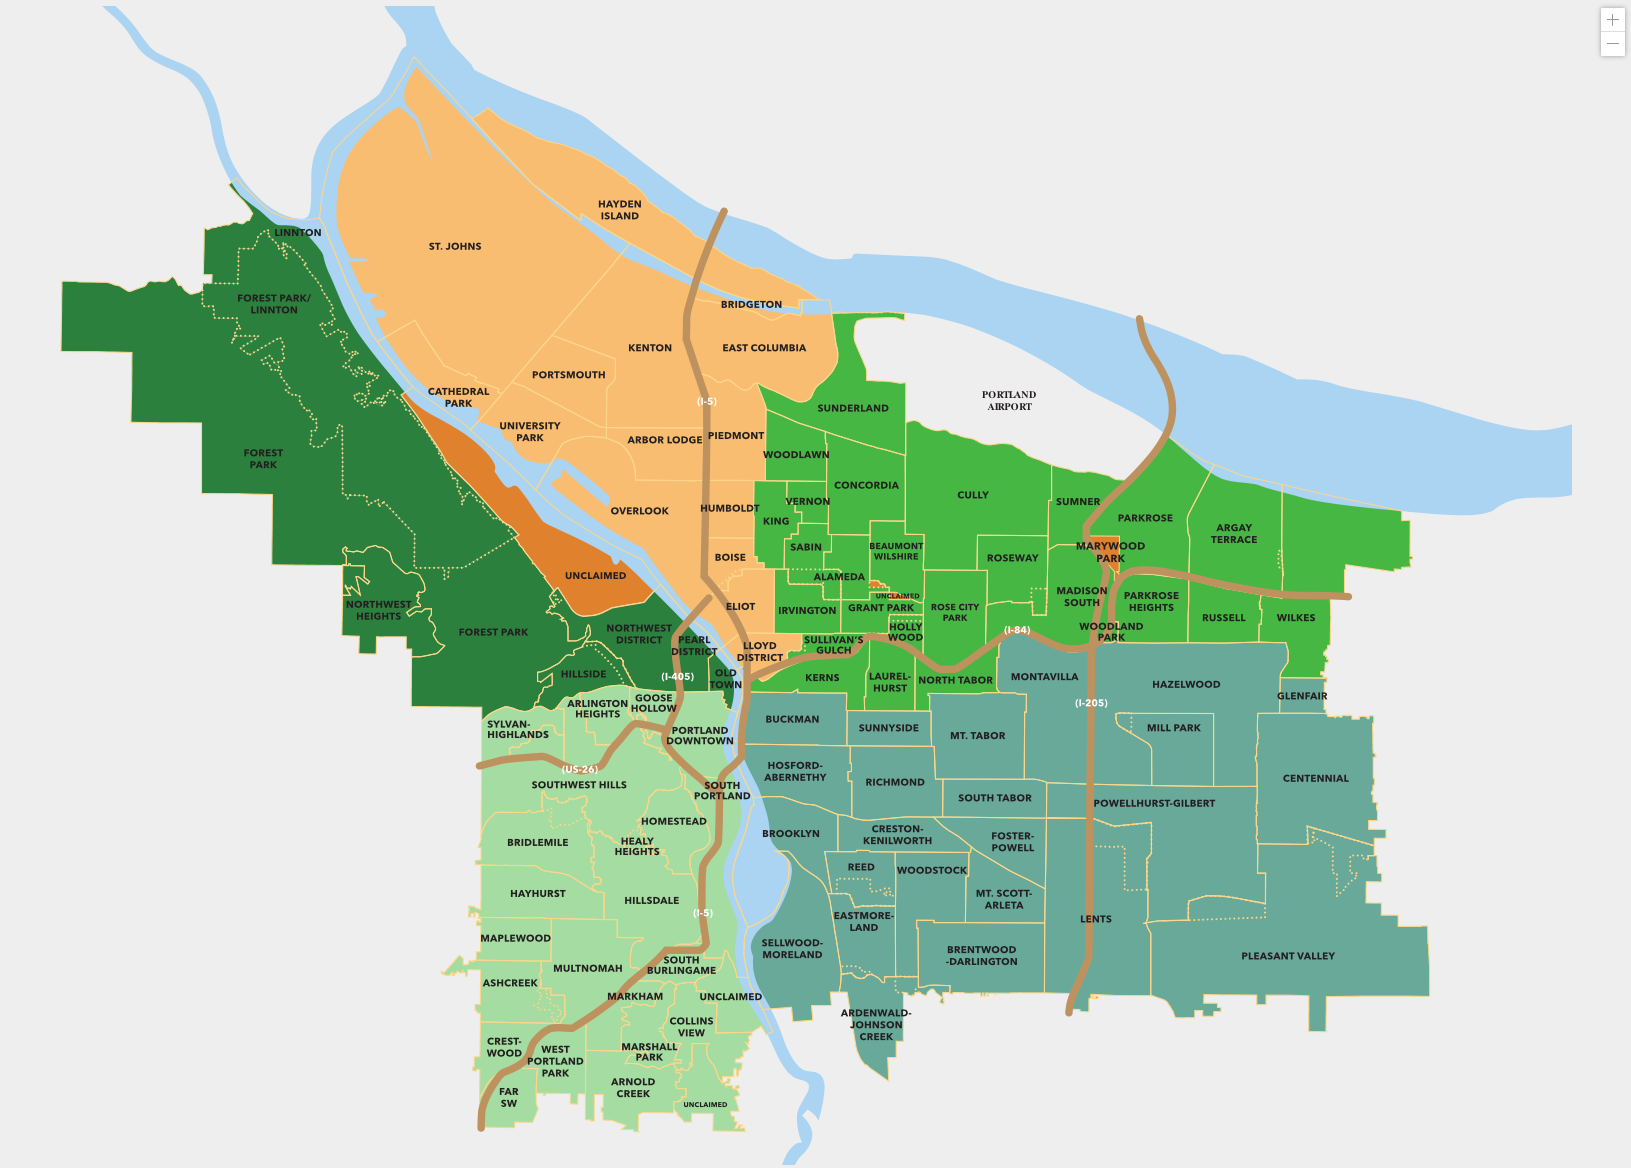

In [20]:
## Portland Neighborhood amp for Reference
from IPython.display import Image
Image(filename='../Resources/portlandmap.png',width=800, height=400)